In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs

In [39]:
# set the dimensions
N = 100
D = 2
M = 4
K = 3

In [40]:
# set the initial weights
# np.random.seed(1234)
W1 = np.random.randn(D,M)
b1 = np.random.randn(M)
W2 = np.random.randn(M,K)
b2 = np.random.randn(K)

In [41]:
print(W1.shape)
print(b1.shape)
print(W2.shape)
print(b2.shape)

(2, 4)
(4,)
(4, 3)
(3,)


In [42]:
print(W1)
print()
print(b1)

[[-1.33199088 -1.1411165  -0.38088623 -0.04023039]
 [ 1.04548618 -0.11453906 -1.51585473 -0.98365058]]

[ 1.02497228 -1.28037254 -0.49801814 -0.10877787]


In [43]:
print(W2)
print()
print(b2)

[[ 2.32539193 -0.0625405  -0.68876843]
 [ 0.32875627 -0.87649428  0.52912815]
 [-2.16168061 -1.89391955 -1.29384287]
 [-0.42847189  0.99406832 -2.14372732]]

[0.61974235 0.12006797 0.50071004]


In [7]:
# X, t = make_classification(n_samples=N, n_features=D, n_classes=K, n_redundant=0, 
#                            n_informative=D, n_clusters_per_class=1)
X, t = make_blobs(n_features=2, centers=3)

In [8]:
print(X.shape)
print(t.shape)

(100, 2)
(100,)


In [9]:
X1 = pd.DataFrame(X, columns=['f1', 'f2'])
t1 = pd.DataFrame(t, columns=['target'])
df = pd.concat([X1, t1], axis=1)

## Graph

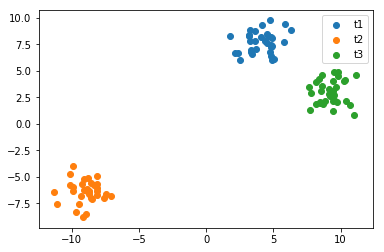

In [10]:
plt.scatter(df.loc[df['target']==0, 'f1'], df.loc[df['target']==0, 'f2'],
           label = 't1')
plt.scatter(df.loc[df['target']==1, 'f1'], df.loc[df['target']==1, 'f2'],
            label = 't2')
plt.scatter(df.loc[df['target']==2, 'f1'], df.loc[df['target']==2, 'f2'],
            label = 't3')
plt.legend()
plt.show()

## Log reg

In [44]:
def Z(X, W, b):
    return np.dot(X, W) + b

In [45]:
def sig(Z):
    return 1/(1+np.exp(-Z))

In [46]:
def soft(Z):
    exp_Z = np.exp(Z)
    return exp_Z/np.sum(exp_Z, axis=1, keepdims=True)

In [47]:
Z1 = Z(X, W1, b1)
Z1.shape

(100, 4)

In [48]:
y1 = sig(Z1)
y1.shape

(100, 4)

In [49]:
Z2 = Z(y1, W2, b2)
Z2.shape

(100, 3)

In [50]:
y2 = soft(Z2)
y2.shape

(100, 3)

In [51]:
def ohe(t):
    result = np.zeros((N,K))
    for i in range(len(t)):
        result[i, t[i]] = 1
    return result

In [52]:
def cost(t, y):
    return -t*np.log(y)

In [53]:
cost1 = cost(ohe(t), y2)
cost1.shape

(100, 3)

In [54]:
def error(cost):
    return (cost.sum())/N

In [55]:
err0 = error(cost1)
err0

1.230970346389561

In [56]:
def accuracy(t, y):
    return (t==np.round(y)).mean()

In [57]:
acc0 = accuracy(ohe(t), y2)
acc0

0.67

In [58]:
err = [err0]
acc = [acc0]

In [59]:
lr = 0.00001
print('initial error: {}'.format(error1))

for e in range(15000):

    Z1 = Z(X, W1, b1)
    y1 = sig(Z1)
    Z2 = Z(y1, W2, b2)
    y2 = soft(Z2)
    cost1 = cost(ohe(t), y2)
    error1 = error(cost1)
    
    dZ2 = (ohe(t) - y2)
    dw2 = np.dot(y1.T, dZ2)
    db2 = (dZ2.sum(axis=0))
    
    dZ1 = np.dot(dZ2, W2.T)*(y1*(1-y1))
    dw1 = np.dot(X.T, dZ1)
    db1 = (dZ1.sum(axis=0))
    
    W2 += lr*dw2
    b2 += lr*db2
    W1 += lr*dw1
    b1 += lr*db1    
    
    if e % 100 == 0:
        err.append(error1)
        acc.append(accuracy(ohe(t), y2))
        print('error:{}'.format(error1))

initial error: 0.17347376166280648
error:1.230970346389561
error:1.1364505702651713
error:1.049731572096956
error:0.9708291173036432
error:0.8998066026851164
error:0.8365982345852833
error:0.7809349211815695
error:0.7323427195560825
error:0.6901890596593262
error:0.6537506034632427
error:0.6222803255880703
error:0.5950600992345749
error:0.5714342654316279
error:0.5508259813324163
error:0.5327409088066158
error:0.516763036794059
error:0.5025464603773975
error:0.48980570138249446
error:0.4783060993323158
error:0.4678550528682446
error:0.4582944219923915
error:0.4494941360546791
error:0.44134691939849446
error:0.4337639920177604
error:0.42667159078127037
error:0.4200081660432363
error:0.4137221264444046
error:0.4077700248660031
error:0.4021150976494207
error:0.39672608601917586
error:0.39157628279579354
error:0.3866427590743111
error:0.3819057348812373
error:0.3773480652683203
error:0.3729548192015637
error:0.36871293326307053
error:0.36461092585685323
error:0.3606386605057839
error:0.356

In [60]:
accuracy(ohe(t), y2)

1.0

## Graph

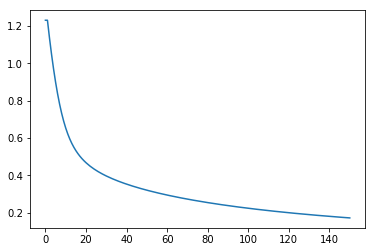

In [61]:
plt.plot(err)
plt.show()

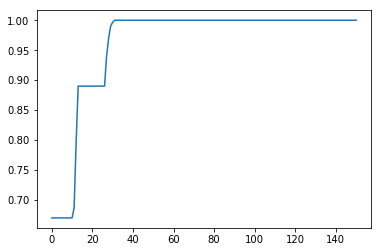

In [63]:
plt.plot(acc)
plt.show()